In [1]:
from sklearn import datasets, model_selection, svm, metrics
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [39]:
##Prepare data##

filename=r'phishing.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')

data_train=data_train.dropna()
colnames = data_train.columns.get_values()


print("\nDESCRIBE DATA:\n",data_train.describe())


DESCRIBE DATA:
        having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       11055.000000  11055.000000        11055.000000      11055.000000   
mean            0.313795     -0.633198            0.738761          0.700588   
std             0.949534      0.766095            0.673998          0.713598   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              11055.000000   11055.000000       11055.000000   
mean                   0.741474      -0.734962           0.063953   
std                    0.671011       0.678139         

In [76]:
from sklearn.tree import DecisionTreeClassifier
###MAKE DECISION TREE###


X_all = data_train.drop(['Result'], axis=1)#data_train
#print(X_all)
y_all = data_train['Result']
#print(y_all.head())


test_size=0.1
train_size=5000

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=test_size, train_size=train_size)

print(X_test.shape)

####
clf = DecisionTreeClassifier(criterion="gini",min_samples_split=100,splitter='best',max_depth=1)
clf.fit(X_train, y_train)


pre = clf.predict(X_test)


accuracy_score = metrics.accuracy_score(y_test, pre)

print("accuracy:", accuracy_score)

(1106, 30)
accuracy: 0.8969258589511754


             0         1         2         3         4         5         6   \
0     -1.383683  2.131943  0.387614  0.419600 -2.595415 -0.390849 -1.301501   
1      0.722709  2.131943  0.387614  0.419600  0.385295 -0.390849 -0.078232   
2      0.722709  0.826563  0.387614  0.419600  0.385295 -0.390849 -1.301501   
3      0.722709  0.826563  0.387614  0.419600  0.385295 -0.390849 -1.301501   
4      0.722709  0.826563 -2.579887  0.419600  0.385295 -0.390849  1.145038   
5     -1.383683  0.826563 -2.579887  0.419600 -2.595415 -0.390849  1.145038   
6      0.722709  0.826563 -2.579887  0.419600  0.385295 -0.390849 -1.301501   
7      0.722709  0.826563  0.387614  0.419600  0.385295 -0.390849 -1.301501   
8      0.722709  0.826563 -2.579887  0.419600  0.385295 -0.390849  1.145038   
9      0.722709  2.131943 -2.579887  0.419600  0.385295 -0.390849 -1.301501   
10     0.722709  2.131943  0.387614  0.419600  0.385295 -0.390849 -0.078232   
11     0.722709  2.131943 -2.579887  0.419600  0.385

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


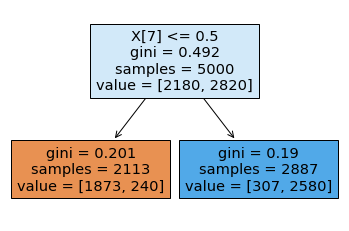

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_train))
print(df_scaled)

from sklearn.tree._export import plot_tree
plt.figure()

plot_tree(clf, filled=True)
plt.show()


#xgb.plot_tree(clf, num_trees=2)
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(150, 100)
#fig.savefig('tree.png')
#plt.show()

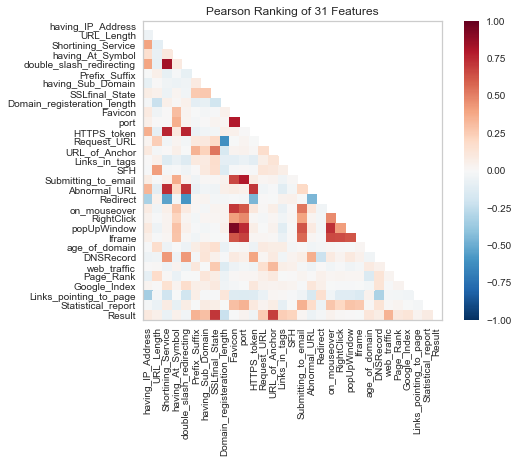

In [78]:
from yellowbrick.features import Rank2D

#df_scaled = pd.DataFrame(df_scaled, columns=colnames)
#print (df_scaled)
#df_scaled.columns=colnames
#print(df_scaled)

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(data_train)# or df_scaled
visualizer.show()